In [39]:
from ISLP import load_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [3]:
oj_df = load_data(dataset="oj")
oj_df

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [10]:
oj_df["Store7"] = np.where(oj_df["Store7"] == "Yes", 1, 0)

## a)

In [11]:
X_test, X_train, y_test, y_train = train_test_split(
    oj_df.drop(columns="Purchase"), oj_df["Purchase"], test_size=800, random_state=0
)
X_train.shape

(800, 17)

## b)

In [12]:
dtc_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [19]:
accuracy_score(y_test, dtc_model.predict(X_test))

0.774074074074074

## c)

[Text(0.44147675992779783, 0.9705882352941176, 'x[8] <= 0.482\ngini = 0.475\nsamples = 800\nvalue = [489, 311]'),
 Text(0.1723826714801444, 0.9117647058823529, 'x[8] <= 0.276\ngini = 0.333\nsamples = 294\nvalue = [62, 232]'),
 Text(0.0740072202166065, 0.8529411764705882, 'x[16] <= 3.5\ngini = 0.151\nsamples = 158\nvalue = [13, 145]'),
 Text(0.06678700361010831, 0.7941176470588235, 'x[8] <= 0.051\ngini = 0.141\nsamples = 157\nvalue = [12, 145]'),
 Text(0.05956678700361011, 0.7352941176470589, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]'),
 Text(0.0740072202166065, 0.7352941176470589, 'x[9] <= 2.26\ngini = 0.209\nsamples = 101\nvalue = [12, 89]'),
 Text(0.06678700361010831, 0.6764705882352942, 'x[15] <= 0.115\ngini = 0.196\nsamples = 100\nvalue = [11, 89]'),
 Text(0.02888086642599278, 0.6176470588235294, 'x[15] <= 0.085\ngini = 0.363\nsamples = 21\nvalue = [5, 16]'),
 Text(0.01444043321299639, 0.5588235294117647, 'x[12] <= 0.5\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.007220

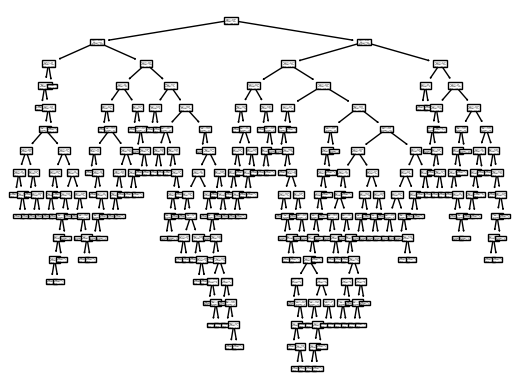

In [22]:
plot_tree(dtc_model)

## d)

In [26]:
print(export_text(dtc_model, feature_names=X_train.columns.tolist()))

|--- LoyalCH <= 0.48
|   |--- LoyalCH <= 0.28
|   |   |--- STORE <= 3.50
|   |   |   |--- LoyalCH <= 0.05
|   |   |   |   |--- class: MM
|   |   |   |--- LoyalCH >  0.05
|   |   |   |   |--- SalePriceMM <= 2.26
|   |   |   |   |   |--- ListPriceDiff <= 0.11
|   |   |   |   |   |   |--- ListPriceDiff <= 0.09
|   |   |   |   |   |   |   |--- Store7 <= 0.50
|   |   |   |   |   |   |   |   |--- class: MM
|   |   |   |   |   |   |   |--- Store7 >  0.50
|   |   |   |   |   |   |   |   |--- LoyalCH <= 0.16
|   |   |   |   |   |   |   |   |   |--- class: MM
|   |   |   |   |   |   |   |   |--- LoyalCH >  0.16
|   |   |   |   |   |   |   |   |   |--- class: CH
|   |   |   |   |   |   |--- ListPriceDiff >  0.09
|   |   |   |   |   |   |   |--- LoyalCH <= 0.08
|   |   |   |   |   |   |   |   |--- class: CH
|   |   |   |   |   |   |   |--- LoyalCH >  0.08
|   |   |   |   |   |   |   |   |--- PctDiscCH <= 0.03
|   |   |   |   |   |   |   |   |   |--- class: MM
|   |   |   |   |   |   |   |   |--- P

## e)

In [32]:
confusion_matrix(y_test, dtc_model.predict(X_test))

array([[128,  36],
       [ 25,  81]], dtype=int64)

## f)

In [34]:
dtc_model_2 = DecisionTreeClassifier(random_state=0)

grid_dtc = GridSearchCV(
    dtc_model_2,
    param_grid={
        "max_depth": [2, 3, 4, 5, 6],
    },
    cv=10,
    scoring="accuracy",
    verbose=1,
)

In [35]:
grid_dtc.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6]}, scoring='accuracy',
             verbose=1)

In [36]:
grid_dtc.best_params_

{'max_depth': 2}

In [37]:
grid_dtc.best_score_

0.8237500000000001

## g)

Depth: 2, Accuracy: 0.7667
Depth: 3, Accuracy: 0.7963
Depth: 4, Accuracy: 0.7963
Depth: 5, Accuracy: 0.8074
Depth: 6, Accuracy: 0.7926
Depth: 7, Accuracy: 0.8074
Depth: 8, Accuracy: 0.8111
Depth: 9, Accuracy: 0.7889
Depth: 10, Accuracy: 0.7852
Depth: 11, Accuracy: 0.7778
Depth: 12, Accuracy: 0.7741
Depth: 13, Accuracy: 0.7815
Depth: 14, Accuracy: 0.7741
Depth: 15, Accuracy: 0.7778
Depth: 16, Accuracy: 0.7778
Depth: 17, Accuracy: 0.7704


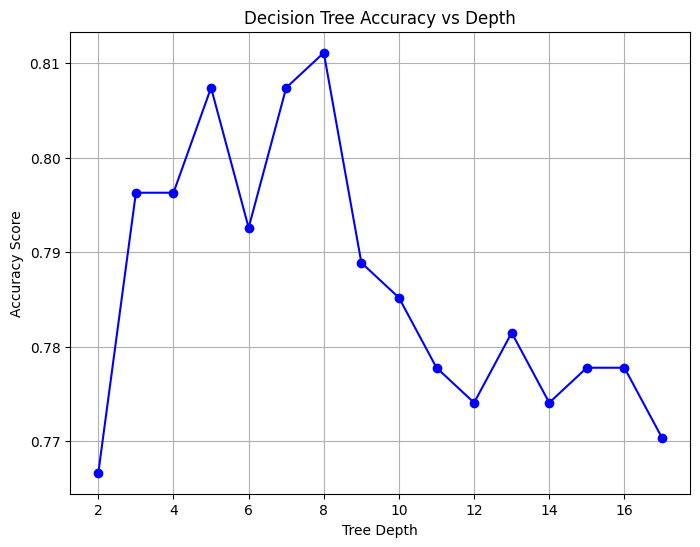

In [40]:
depths = []
accuracy_scores = []

# Loop over depths from 2 to len(X_train.columns)
for depth in range(2, len(X_train.columns) + 1):
    # Train a DecisionTreeClassifier with max_depth=depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store depth and accuracy
    depths.append(depth)
    accuracy_scores.append(accuracy)

    print(f"Depth: {depth}, Accuracy: {accuracy:.4f}")

# Plot the depth vs accuracy
plt.figure(figsize=(8, 6))
plt.plot(depths, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Accuracy vs Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()


## h) 
depth=2

## i)

In [42]:
ccp_path = dtc_model.cost_complexity_pruning_path(X_train, y_train)

In [44]:
grid = GridSearchCV(
    dtc_model,
    param_grid={"ccp_alpha": ccp_path.ccp_alphas},
    cv=10,
    scoring="accuracy",
    refit=True,
)
grid.fit(X_train, y_train)
grid.best_score_

0.82

## k)
the Test error of the best unpruned tree is smaller than the pruned